## Importing Appropriate Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Appropriate Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

#basic imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import gzip
import shutil
from time import time

#pre-processing imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!pip install transformers
from transformers import BertTokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Load the Data

In [3]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import dataset
book_rating = pd.read_csv("/content/drive/MyDrive/Team_8_Project_Datasets_M1/Books_rating.csv")

In [5]:
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
book_rating.shape

(3000000, 10)

## Data Exploration

In [7]:
# general check on data shape
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [8]:
# check the frequency of score level in the review/score Column
book_rating['review/score'].value_counts()

5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: review/score, dtype: int64

## Data Transformation

In [9]:
# transform values 4-5 to value "Positive"; transform values 3 to value "Neutral"; and transform values 1-2 to value "Negative", for the Sentiment Column
book_rating['review/score'] = book_rating['review/score'].replace(5.0, 'Positive')
book_rating['review/score'] = book_rating['review/score'].replace(4.0, 'Positive')
book_rating['review/score'] = book_rating['review/score'].replace(3.0, 'Neutral')
book_rating['review/score'] = book_rating['review/score'].replace(2.0, 'Negative')
book_rating['review/score'] = book_rating['review/score'].replace(1.0, 'Negative')
book_rating['review/score'].value_counts()

Positive    2392959
Negative     352746
Neutral      254295
Name: review/score, dtype: int64

In [10]:
# check how it looks
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,Positive,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,Positive,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,Positive,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,Positive,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,Positive,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Prepare the Datasets for Training

In [11]:
# Balance the dataset
sample_size = 10000
df_positive = book_rating[(book_rating['review/score']=='Positive')].sample(n=sample_size, random_state=42)
df_neutral = book_rating[(book_rating['review/score']=='Neutral')].sample(n=sample_size, random_state=42)
df_negative = book_rating[(book_rating['review/score']=='Negative')].sample(n=sample_size, random_state=42)

our_data = pd.concat([df_positive, df_neutral, df_negative], ignore_index=True)
our_data = our_data[["review/text","review/score"]]

In [12]:
# Check how it looks
print(our_data.shape)
print(our_data['review/score'].value_counts())

(30000, 2)
Positive    10000
Neutral     10000
Negative    10000
Name: review/score, dtype: int64


In [13]:
# Check how it looks
our_data.head()

,review/text,review/score
0,Highly recommend this book. Very short but wel...,Positive
1,Jack Whyte continues his tale of Publius Varru...,Positive
2,This tale of her nightmares and subsequently u...,Positive
3,I'm an avid reader. I read everything from Ste...,Positive
4,The science of interpretting the hidden meanin...,Positive


In [14]:
# Transform review/score column using label encoding: Positive = 2, Neutral = 1, Negative = 0
our_data['review/score'] = our_data['review/score'].replace('Positive', 2)
our_data['review/score'] = our_data['review/score'].replace('Neutral', 1)
our_data['review/score'] = our_data['review/score'].replace('Negative', 0)
our_data.head()

,review/text,review/score
0,Highly recommend this book. Very short but wel...,2
1,Jack Whyte continues his tale of Publius Varru...,2
2,This tale of her nightmares and subsequently u...,2
3,I'm an avid reader. I read everything from Ste...,2
4,The science of interpretting the hidden meanin...,2


In [15]:
print(our_data['review/score'].value_counts())

2    10000
1    10000
0    10000
Name: review/score, dtype: int64


In [16]:
our_data['review/score'].dtype

dtype('int64')

In [17]:
# Prepare the data for our model trainning
import sklearn
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# split X and y into training, validation, and testing sets. By default, it splits 75% training and 25% test
# random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(our_data['review/text'], our_data['review/score'], stratify=our_data['review/score'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print(len(X_train), len(y_train))
print(len(X_val), len(y_val))
print(len(X_test), len(y_test))

18000 18000
6000 6000
6000 6000


In [18]:
# Load the BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [19]:
# Define the BERT encoding function
def encode_texts(tokenizer, texts, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
            max_length=max_length,    # Pad & truncate all sentences.
            padding='max_length',
            truncation=True,
            return_attention_mask=True,  # Construct attention masks.
            return_tensors='np',  # Return numpy arrays.
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    # Convert lists to arrays
    input_ids = np.concatenate(input_ids, axis=0)
    attention_masks = np.concatenate(attention_masks, axis=0)

    return input_ids, attention_masks

In [20]:
# Encodes the text
max_length = 512 #256
train_input_ids, train_attention_masks = encode_texts(tokenizer, X_train.tolist(), max_length)
val_input_ids, val_attention_masks = encode_texts(tokenizer, X_val.tolist(), max_length)
test_input_ids, test_attention_masks = encode_texts(tokenizer, X_test.tolist(), max_length)

In [21]:
# Prepare the labels
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [22]:
# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

## Model Training #1: A Single LSTM Layer - Done

In [23]:
# Install and import required libraries
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [24]:
import tensorflow as tf
from transformers import TFBertModel

class BertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        self.bert = bert_model  # Pass an instance of TFBertModel

    def call(self, inputs):
        input_ids, attention_mask = inputs
        # Call the BERT model, extract the sequence outputs
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = bert_output.last_hidden_state
        return sequence_output

# Instantiate BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Model configuration
max_length = 256  # Adjust based on your analysis of the text lengths

# Define input layers
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# Instantiate and call the custom BERT embedding layer
bert_embedding_layer = BertEmbeddingLayer(bert_model)
sequence_output = bert_embedding_layer((input_ids, attention_mask))

# Continue with the rest of your model
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(sequence_output)
dropout_layer = tf.keras.layers.Dropout(0.2)(lstm_layer)
classification_layer = tf.keras.layers.Dense(3, activation='softmax')(dropout_layer)

# Construct the model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=classification_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 256, 768)             1094822   ['input_ids[0][0]',           
 EmbeddingLayer)                                          40         'attention_mask[0][0]']      
                                                                                              

In [25]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 680s 1s/step - loss: 0.6834 - accuracy: 0.6959 - val_loss: 0.6044 - val_accuracy: 0.7357


In [26]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 55s 246ms/step


Accuracy:  0.7341666666666666
Recall (macro): 0.7341666666666667
F1 score (macro): 0.7352583256681946


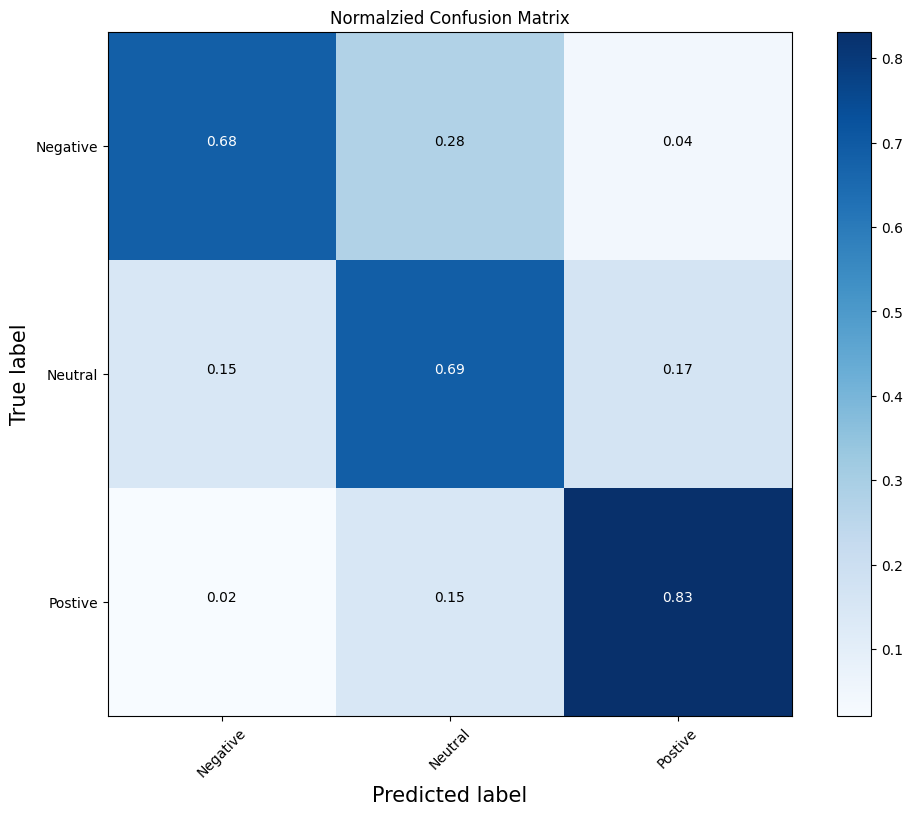

In [27]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [28]:
history_1 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 615s 1s/step - loss: 0.4389 - accuracy: 0.8244 - val_loss: 0.6493 - val_accuracy: 0.7280


In [29]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 46s 247ms/step


Accuracy:  0.7245
Recall (macro): 0.7244999999999999
F1 score (macro): 0.7250524023719528


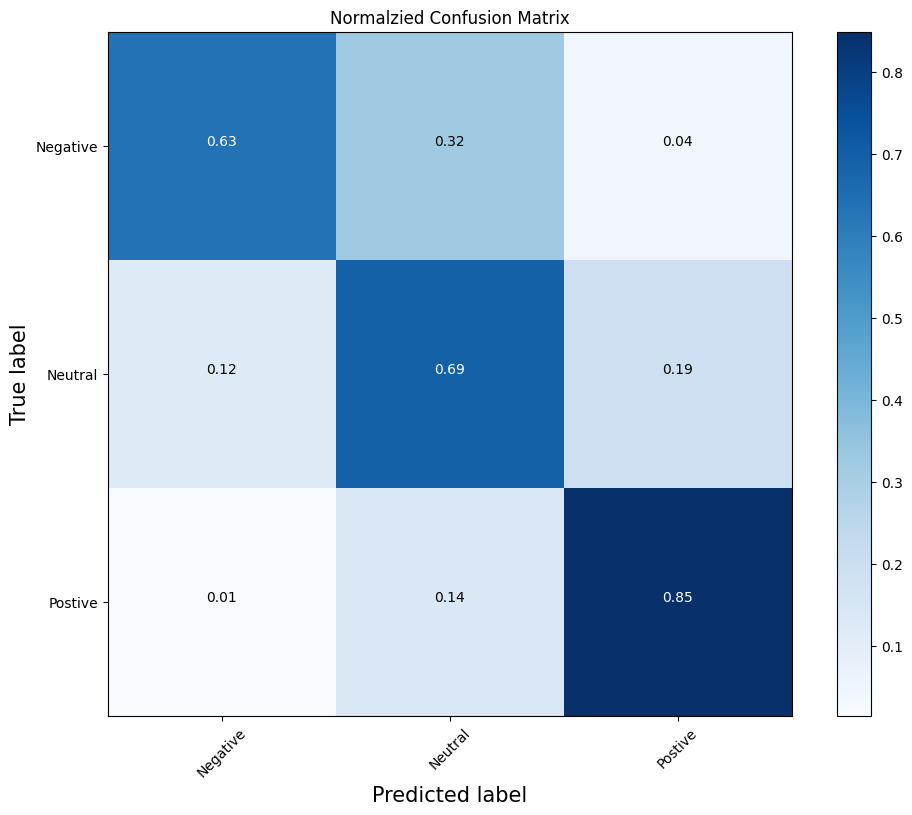

In [30]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [31]:
history_2 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 613s 1s/step - loss: 0.1991 - accuracy: 0.9304 - val_loss: 0.7617 - val_accuracy: 0.7290


In [32]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 46s 246ms/step


Accuracy:  0.74
Recall (macro): 0.7399999999999999
F1 score (macro): 0.7393370104313264


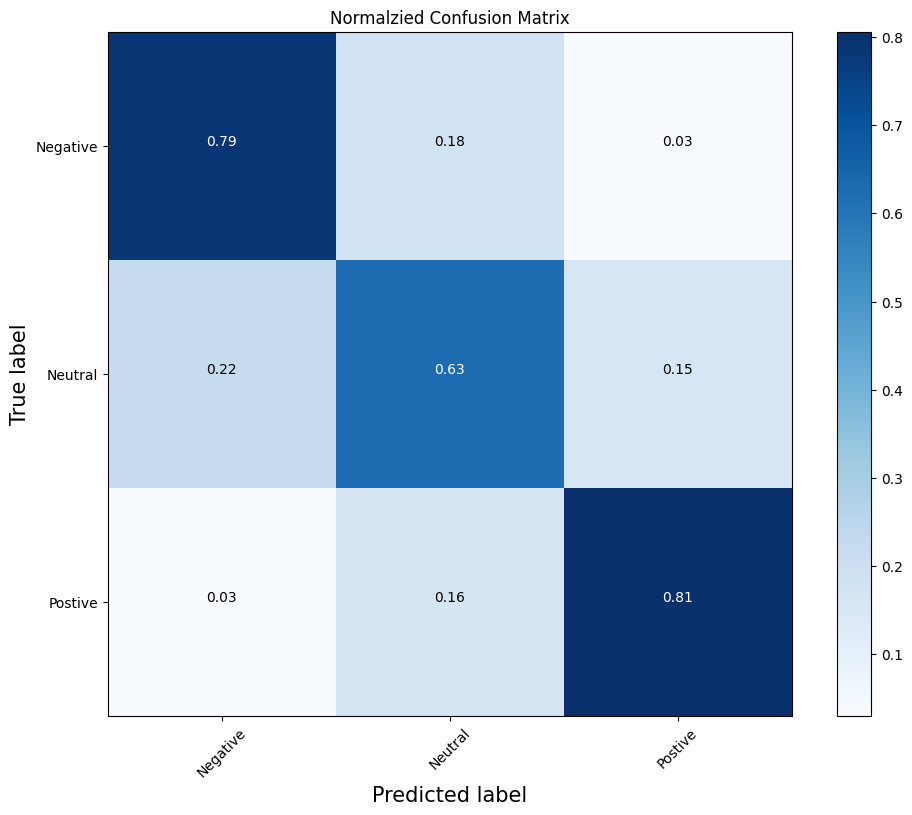

In [33]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

## Model Training #2: Setting Max_Length to 512 to capture more text

In [23]:
# Install and import required libraries
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [24]:
import tensorflow as tf
from transformers import TFBertModel

class BertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        self.bert = bert_model  # Pass an instance of TFBertModel

    def call(self, inputs):
        input_ids, attention_mask = inputs
        # Call the BERT model, extract the sequence outputs
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = bert_output.last_hidden_state
        return sequence_output

# Instantiate BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Model configuration
max_length = 512  # Adjust based on your analysis of the text lengths

# Define input layers
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# Instantiate and call the custom BERT embedding layer
bert_embedding_layer = BertEmbeddingLayer(bert_model)
sequence_output = bert_embedding_layer((input_ids, attention_mask))

# Continue with the rest of your model
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(sequence_output)
dropout_layer = tf.keras.layers.Dropout(0.2)(lstm_layer)
classification_layer = tf.keras.layers.Dense(3, activation='softmax')(dropout_layer)

# Construct the model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=classification_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 512, 768)             1094822   ['input_ids[0][0]',           
 EmbeddingLayer)                                          40         'attention_mask[0][0]']      
                                                                                              

In [25]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 1121s 2s/step - loss: 0.6699 - accuracy: 0.7030 - val_loss: 0.5827 - val_accuracy: 0.7527


In [26]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 83s 399ms/step


Accuracy:  0.7441666666666666
Recall (macro): 0.7441666666666666
F1 score (macro): 0.7406098266941642


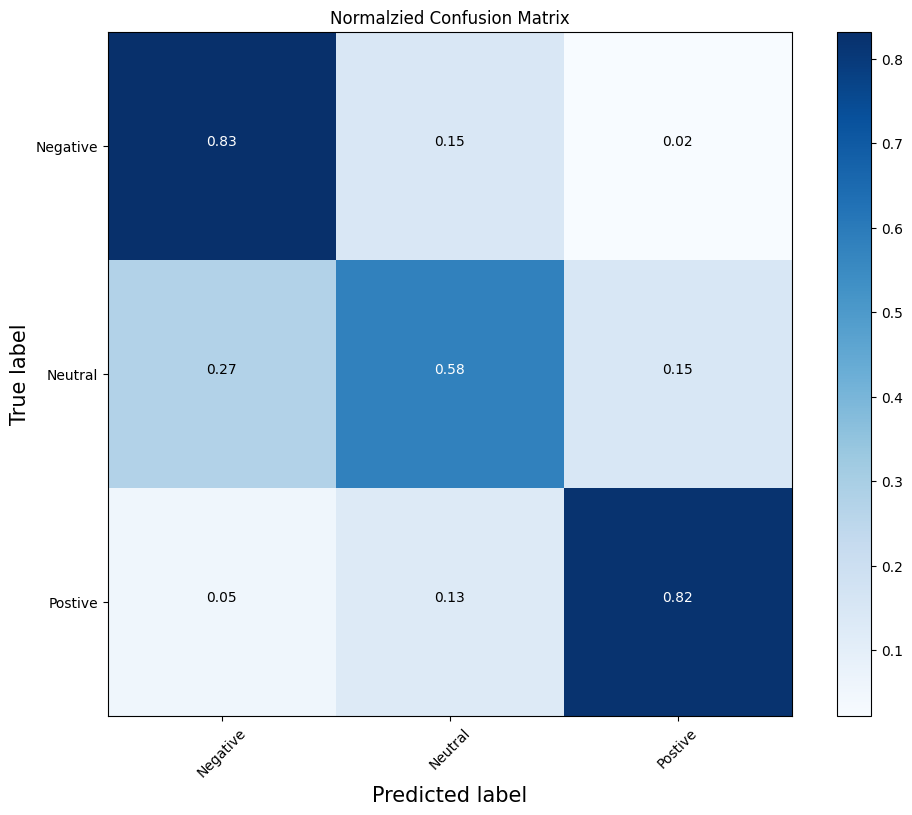

In [27]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [28]:
history_1 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 1062s 2s/step - loss: 0.4180 - accuracy: 0.8334 - val_loss: 0.6394 - val_accuracy: 0.7333


In [29]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 75s 400ms/step


Accuracy:  0.7368333333333333
Recall (macro): 0.7368333333333333
F1 score (macro): 0.73859685786478


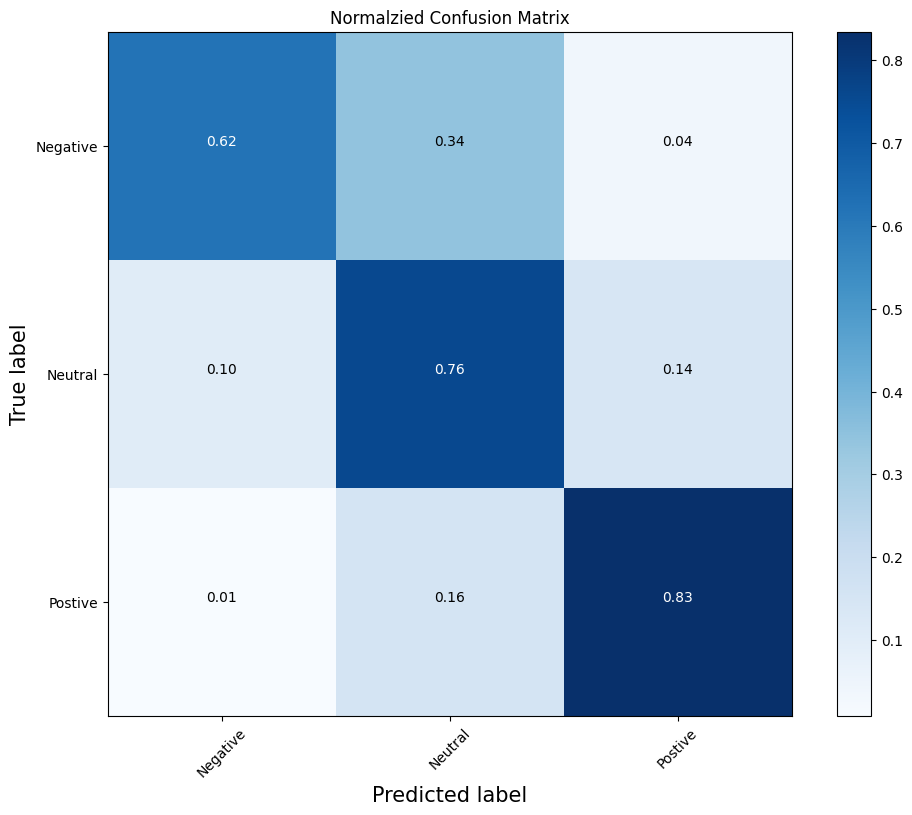

In [30]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [31]:
history_2 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 1065s 2s/step - loss: 0.1935 - accuracy: 0.9327 - val_loss: 0.8082 - val_accuracy: 0.7388


In [32]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 75s 400ms/step


Accuracy:  0.7463333333333333
Recall (macro): 0.7463333333333333
F1 score (macro): 0.7484330469315603


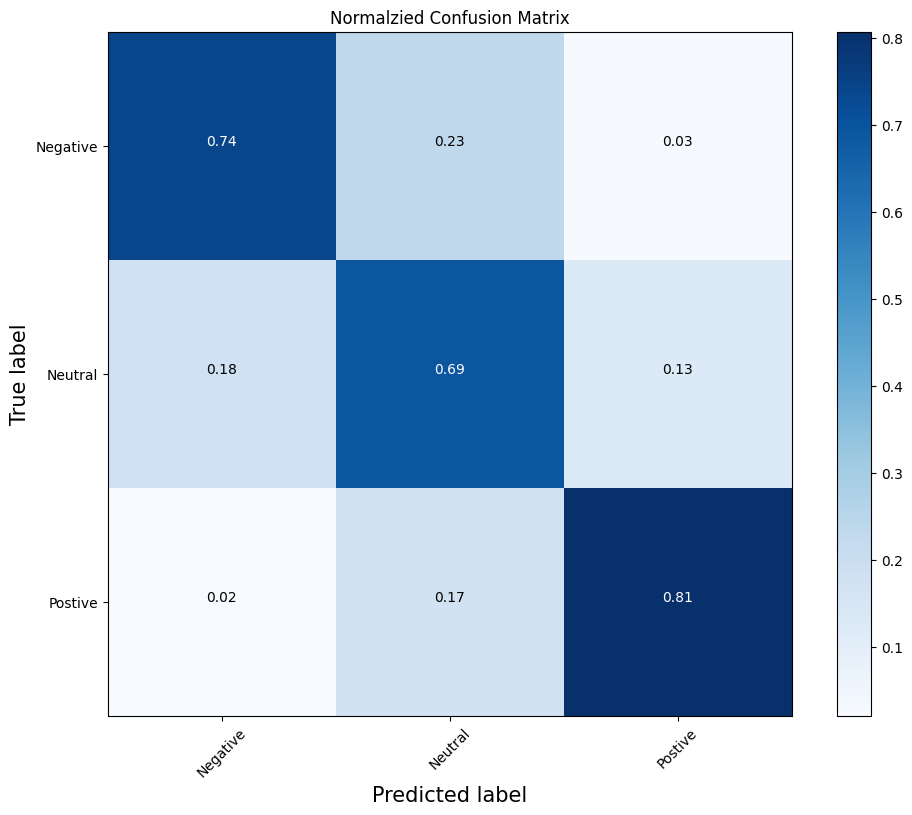

In [33]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Using higher length of each entry seems not helping by much. Let's stick with max_length N=256 rather than 512, also for the sake of saving calculating resources.

## Model Training #3: A Moderate Multi-Layer Structure - Done

In [34]:
# Install and import required libraries
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [35]:
import tensorflow as tf
from transformers import TFBertModel

class BertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        self.bert = bert_model  # Pass an instance of TFBertModel

    def call(self, inputs):
        input_ids, attention_mask = inputs
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = bert_output.last_hidden_state
        return sequence_output

# Instantiate BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Model configuration
max_length = 256  # Adjust based on your analysis of the text lengths

# Define input layers
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# Custom BERT embedding layer
bert_embedding_layer = BertEmbeddingLayer(bert_model)
sequence_output = bert_embedding_layer((input_ids, attention_mask))

# Bi-directional LSTM layer
lstm_layer = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False))(sequence_output)

# Dropout for regularization
dropout_layer = tf.keras.layers.Dropout(0.2)(lstm_layer)

# MLP for additional representation learning
mlp_layer1 = tf.keras.layers.Dense(128, activation='relu')(dropout_layer)
mlp_dropout1 = tf.keras.layers.Dropout(0.2)(mlp_layer1)
mlp_layer2 = tf.keras.layers.Dense(64, activation='relu')(mlp_dropout1)
mlp_dropout2 = tf.keras.layers.Dropout(0.2)(mlp_layer2)

# Final classification layer
classification_layer = tf.keras.layers.Dense(3, activation='softmax')(mlp_dropout2)

# Construct the model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=classification_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer_1 (Be  (None, 256, 768)             1094822   ['input_ids[0][0]',           
 rtEmbeddingLayer)                                        40         'attention_mask[0][0]']      
                                                                                            

In [36]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 681s 1s/step - loss: 0.7497 - accuracy: 0.6615 - val_loss: 0.6372 - val_accuracy: 0.7268


In [37]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 55s 246ms/step


Accuracy:  0.7208333333333333
Recall (macro): 0.7208333333333332
F1 score (macro): 0.7227441533771817


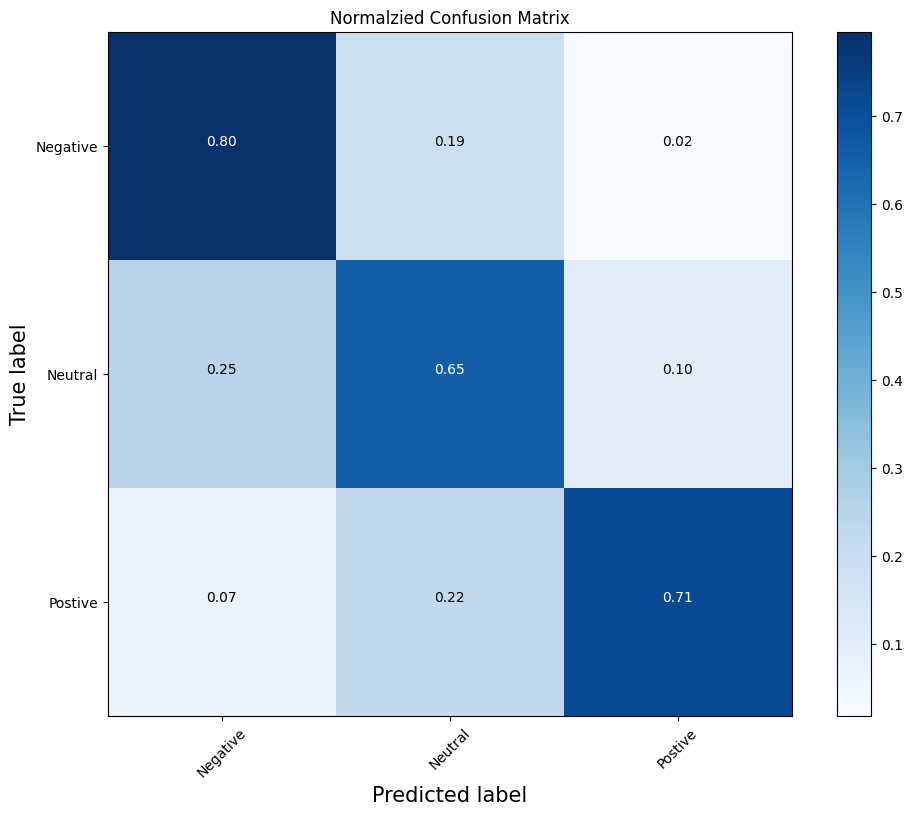

In [38]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [39]:
history_1 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 619s 1s/step - loss: 0.5292 - accuracy: 0.7944 - val_loss: 0.6278 - val_accuracy: 0.7330


In [40]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 46s 245ms/step


Accuracy:  0.7363333333333333
Recall (macro): 0.7363333333333334
F1 score (macro): 0.7346895681364122


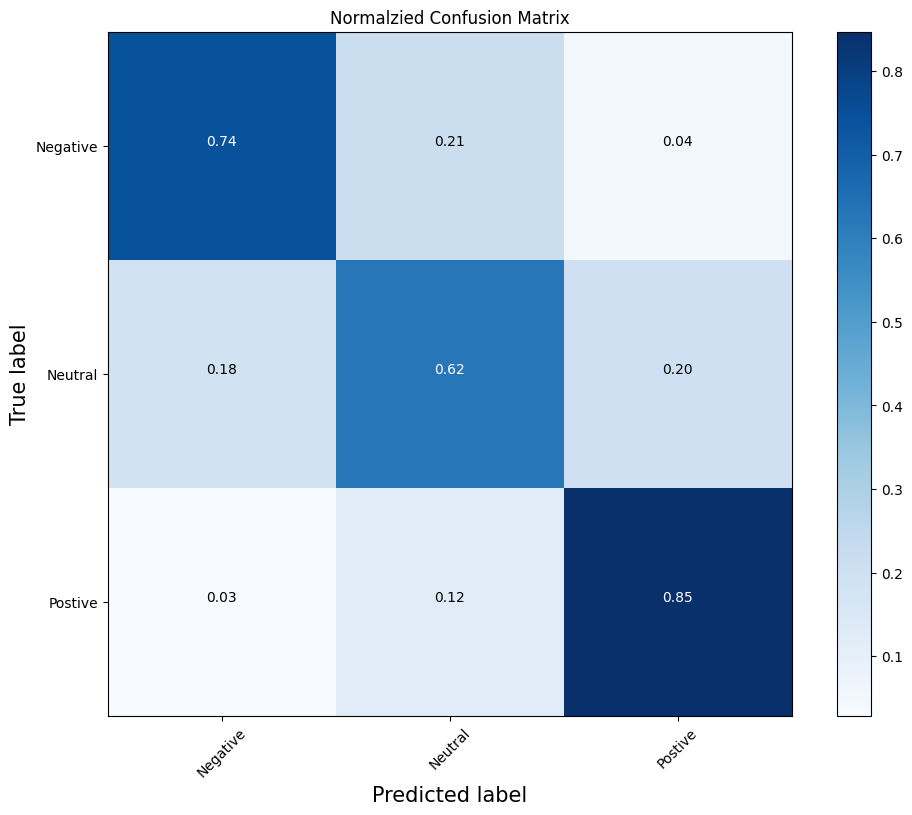

In [41]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [42]:
history_2 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 617s 1s/step - loss: 0.3305 - accuracy: 0.8875 - val_loss: 0.7446 - val_accuracy: 0.7312


In [43]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 46s 245ms/step


Accuracy:  0.7353333333333333
Recall (macro): 0.7353333333333333
F1 score (macro): 0.7346424109278754


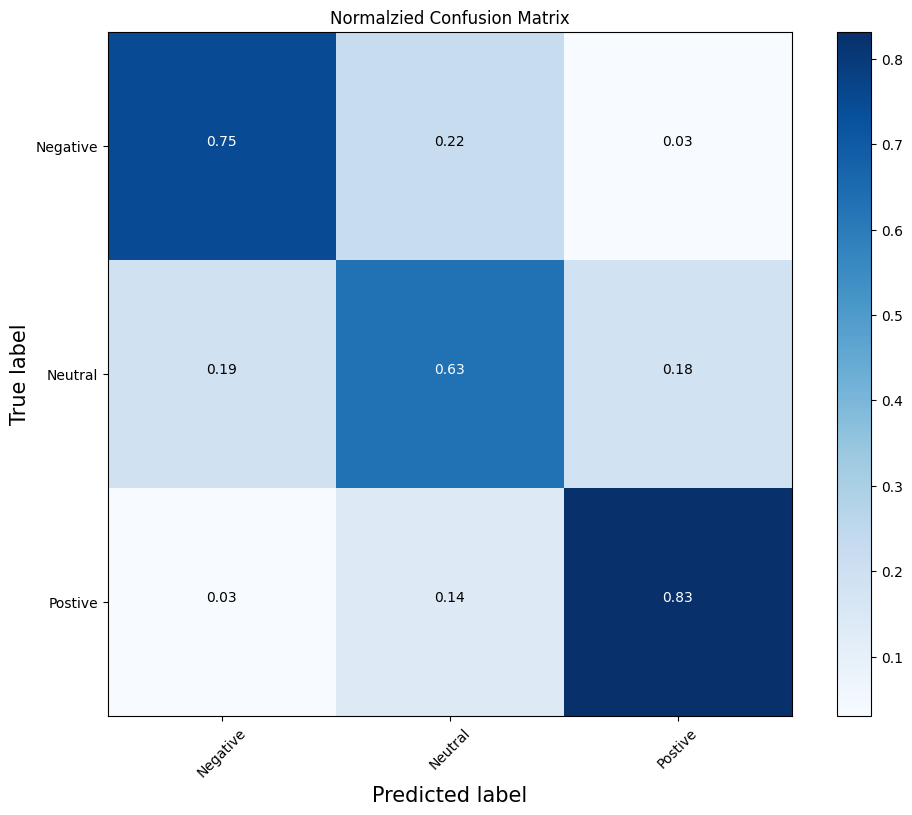

In [44]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

## Model Training #4: A Double LSTM-Layer Structure - Done

In [23]:
# Install and import required libraries
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [24]:
from transformers import TFBertModel
import tensorflow as tf

class BertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertEmbeddingLayer, self).__init__(**kwargs)
        self.bert = bert_model  # Pass an instance of TFBertModel

    def call(self, inputs):
        input_ids, attention_mask = inputs
        bert_output = self.bert(input_ids, attention_mask=attention_mask)
        sequence_output = bert_output.last_hidden_state
        return sequence_output

# Instantiate BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Model configuration
max_length = 256  # Adjust based on your analysis of the text lengths

# Define input layers
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# Instantiate and call the custom BERT embedding layer
bert_embedding_layer = BertEmbeddingLayer(bert_model)
sequence_output = bert_embedding_layer((input_ids, attention_mask))

# First LSTM layer with return_sequences=True to pass sequences to the next LSTM layer
lstm_layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(sequence_output)

# Second LSTM layer, processing the output from the first LSTM layer
lstm_layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False))(lstm_layer1)  # Reduced the number of units for demonstration

# Dropout for regularization
dropout_layer = tf.keras.layers.Dropout(0.2)(lstm_layer2)

# Classification layer
classification_layer = tf.keras.layers.Dense(3, activation='softmax')(dropout_layer)

# Construct the model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=classification_layer)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert_embedding_layer (Bert  (None, 256, 768)             1094822   ['input_ids[0][0]',           
 EmbeddingLayer)                                          40         'attention_mask[0][0]']      
                                                                                              

In [25]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 956s 2s/step - loss: 0.6973 - accuracy: 0.6931 - val_loss: 0.6255 - val_accuracy: 0.7285


In [26]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 65s 301ms/step


Accuracy:  0.7271666666666666
Recall (macro): 0.7271666666666667
F1 score (macro): 0.7185456933998694


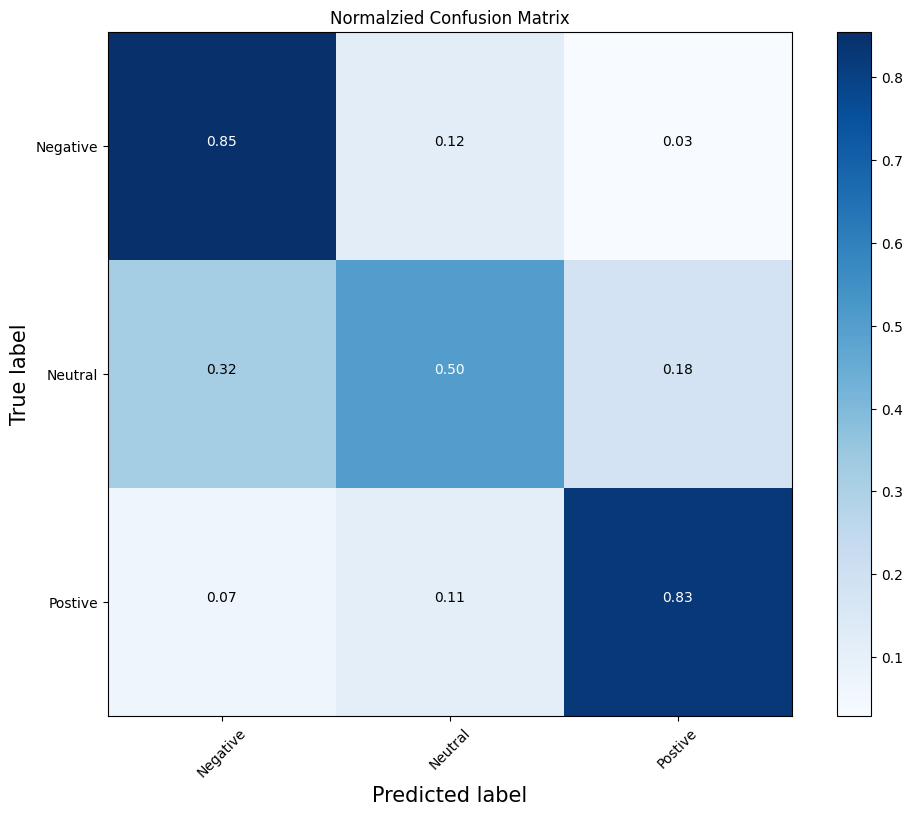

In [27]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

In [28]:
history_1 = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_data=([val_input_ids, val_attention_masks], y_val),
    epochs=1,
    batch_size=32
)

563/563 [==============================] - 887s 2s/step - loss: 0.4669 - accuracy: 0.8183 - val_loss: 0.6481 - val_accuracy: 0.7337


In [29]:
# Making prediction in the testset
predictions = model.predict([test_input_ids, test_attention_masks])

# Convert predictions to class indices by taking the argmax
predicted_class_indices = np.argmax(predictions, axis=1)

188/188 [==============================] - 56s 300ms/step


Accuracy:  0.7328333333333333
Recall (macro): 0.7328333333333333
F1 score (macro): 0.7362125612823895


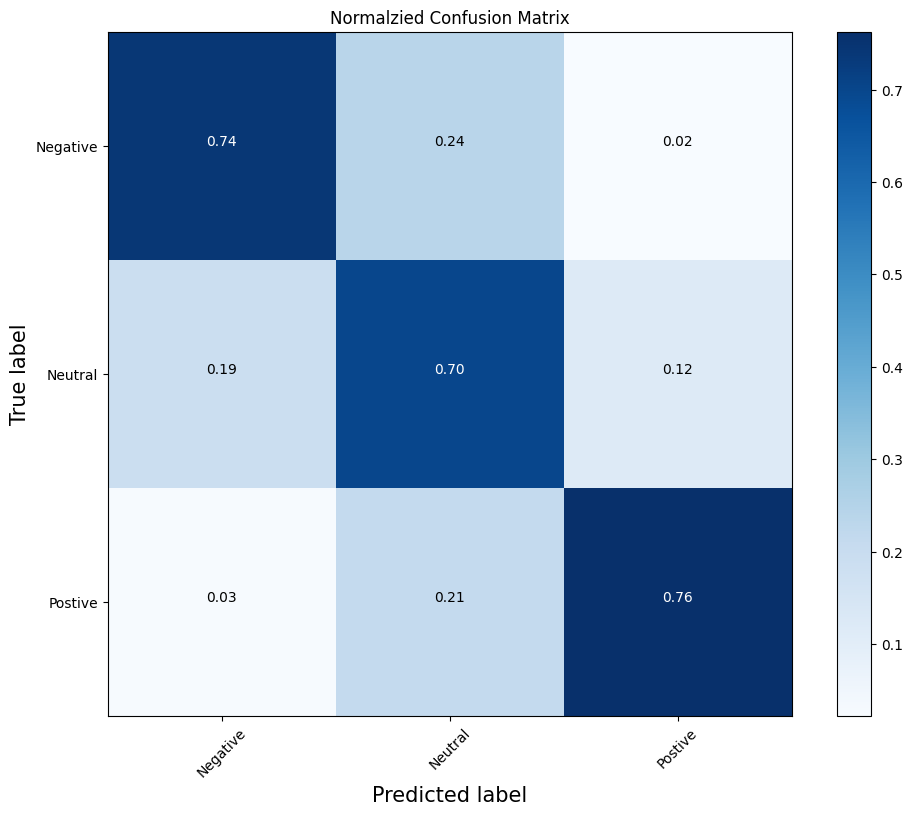

In [30]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_class_indices))
print("Recall (macro):",metrics.recall_score(y_test, predicted_class_indices, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, predicted_class_indices, average='macro'))
cnf_matrix = confusion_matrix(y_test, predicted_class_indices)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')